In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.metrics._plot.confusion_matrix import product
from tqdm import tqdm

In [596]:
current_tickers= (pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[2].Symbol).to_list()

In [597]:
len(current_tickers)

50

In [598]:
historical_tickers = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[3].Symbol.to_list() + pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[3].Symbol_2.to_list()

In [599]:
historical_tickers = ['STLTECH' if x == 'STERLITE' else x for x in historical_tickers]
historical_tickers = ['NESTLEIND' if x == 'NESTLE' else x for x in historical_tickers]

In [600]:
len(historical_tickers)

82

In [601]:
all_tickers = current_tickers + historical_tickers

In [602]:
len(all_tickers)

132

In [603]:
all_tickers = list(set(all_tickers))

In [604]:
len(all_tickers)

87

In [605]:
all_tickers = [i + '.NS' for i in all_tickers]

In [606]:
all_tickers = ['STLTECH.NS' if x == 'STERLITE.NS' else x for x in all_tickers]
all_tickers = ['NESTLEIND.NS' if x == 'NESTLE.NS' else x for x in all_tickers]

In [607]:
shifts = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[3]

In [608]:
shifts.iloc[:,-2] = pd.to_datetime(shifts.iloc[:,-2])

In [682]:
data = yf.download(all_tickers, start = '2010-05-01')['Adj Close']

[*********************100%***********************]  87 of 87 completed

3 Failed downloads:
- CAIRN.NS: No data found for this date range, symbol may be delisted
- RANBAXY.NS: No data found for this date range, symbol may be delisted
- INFRATEL.NS: No data found, symbol may be delisted


In [683]:
data = data.iloc[:-2]

In [684]:
historical_tickers = list(set(historical_tickers))

In [685]:
final_data = data.copy()

In [686]:
for i in range(len(historical_tickers)):
    filtered = shifts[(shifts['Symbol'] == historical_tickers[i]) | (shifts['Symbol_2'] == historical_tickers[i])]
    added = []
    
    for j in range(len(filtered)):
        if filtered.iloc[j, 4] == historical_tickers[i]:
            added.append(filtered.iloc[j, 5])
        added.append(":")
        if filtered.iloc[j, 1] == historical_tickers[i]:
            added.append(filtered.iloc[j, 5])
    
    print(historical_tickers[i])
    print(added)
    print('\n')
    
    ticker = historical_tickers[i] + '.NS'
    
    if len(added) == 2:
        if added[0] == ':':
            data.loc[:, ticker] = data.loc[:added[1], ticker]
        if added[1] == ':':
            data.loc[:, ticker] = data.loc[added[0]:, ticker]
    
    if len(added) == 4:
        if added[0] == ':':
            data[ticker].loc[added[1] :added[2]] = np.nan
                                           
        if added[1] == ':':
            data.loc[:, ticker] = data.loc[added[0]:added[3]][ticker]
    
    if len(added) == 6:
        if added[0] == ':':
            data[ticker].loc[added[1]:added[2]] = np.nan
            data[ticker].loc[added[5]:] = np.nan
            
        if added[1] == ':':                 
            data[ticker].loc[:added[0]] = np.nan
            data[ticker].loc[added[3]:added[4]] = np.nan
    
    if len(added) == 8:
        if added[0] == ':':                             
            data[ticker].loc[added[1]:added[2]] = np.nan
            data[ticker].loc[added[5]:added[6]] = np.nan

                                           
        if added[1] == ':':
                             
                             
            data[ticker].loc[:added[0]] = np.nan
            data[ticker].loc[added[3]:added[4]] = np.nan
            data[ticker].loc[added[7]:] = np.nan

SBILIFE
[Timestamp('2020-09-25 00:00:00'), ':']


BRITANNIA
[Timestamp('2019-03-29 00:00:00'), ':']


MCDOWELL-N
[Timestamp('2014-03-28 00:00:00'), ':', ':', Timestamp('2014-09-19 00:00:00')]


ASIANPAINT
[Timestamp('2012-04-27 00:00:00'), ':']


HDFCLIFE
[Timestamp('2020-07-31 00:00:00'), ':']


AMBUJACEM
[':', Timestamp('2018-04-02 00:00:00')]


VEDL
[Timestamp('2010-10-01 00:00:00'), ':', ':', Timestamp('2016-04-01 00:00:00'), Timestamp('2017-05-26 00:00:00'), ':', ':', Timestamp('2020-07-31 00:00:00')]


SHREECEM
[Timestamp('2020-03-19 00:00:00'), ':', ':', Timestamp('2022-09-30 00:00:00')]


LUPIN
[Timestamp('2012-09-28 00:00:00'), ':', ':', Timestamp('2018-09-28 00:00:00')]


INFRATEL
[Timestamp('2016-04-01 00:00:00'), ':', ':', Timestamp('2020-09-25 00:00:00')]


PNB
[':', Timestamp('2016-04-01 00:00:00')]


IDFC
[':', Timestamp('2015-05-29 00:00:00')]


NESTLEIND
[]


UPL
[Timestamp('2017-09-29 00:00:00'), ':']


STLTECH
[]


EICHERMOT
[Timestamp('2016-04-01 00:00:00'), ':']




<AxesSubplot:ylabel='Date'>

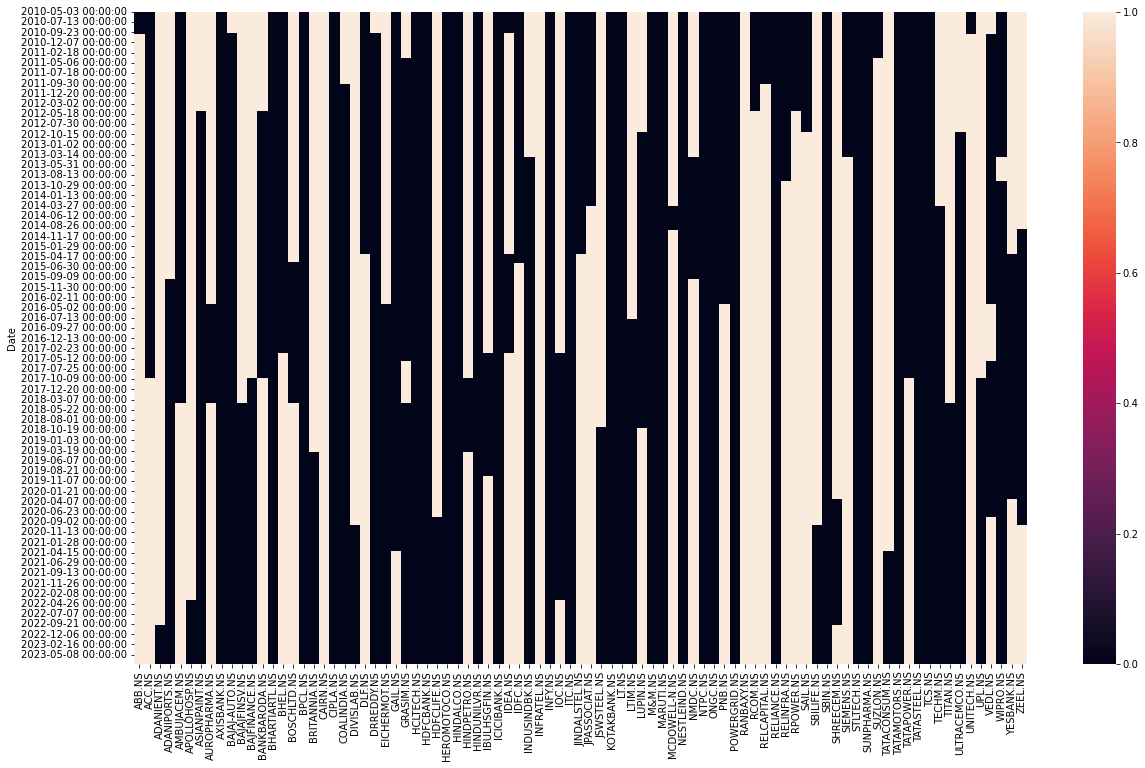

In [687]:
plt.figure(figsize = (20,12))
sns.heatmap(data.isna())

In [688]:
number_of_stocks = []
for i in range(len(data)):
    number_of_stocks.append(len(data.iloc[i].dropna()))

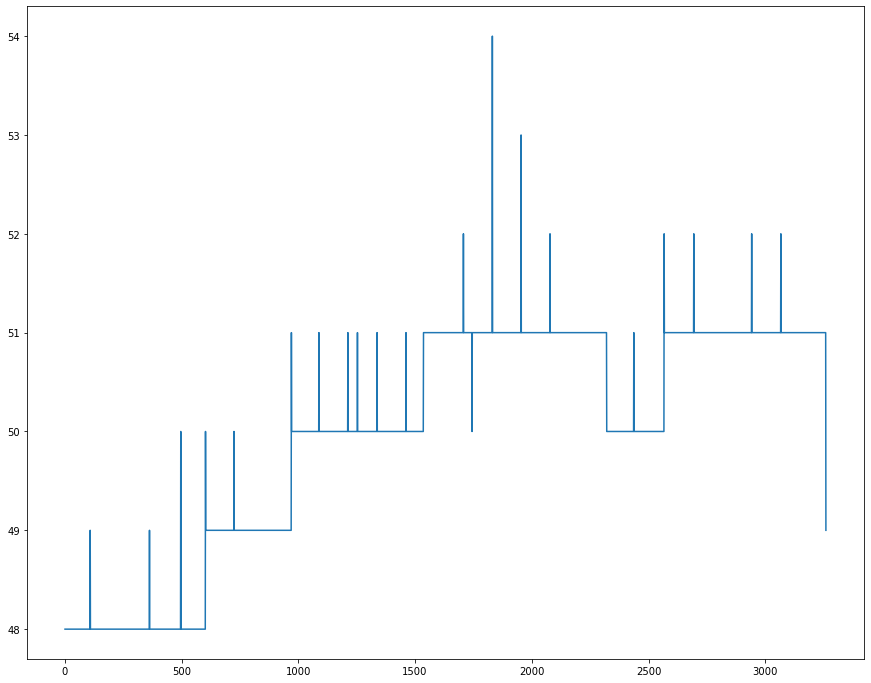

In [689]:
plt.figure(figsize = (15,12))
plt.plot(number_of_stocks)

In [690]:
data

,ABB.NS,ACC.NS,ADANIENT.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,...,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UNITECH.NS,UPL.NS,VEDL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-05-03,694.073669,710.022705,NaN,NaN,92.589973,NaN,NaN,NaN,229.630051,NaN,...,294.238983,NaN,NaN,NaN,82.461700,NaN,NaN,132.917587,NaN,NaN
2010-05-04,678.974060,689.987793,NaN,NaN,89.321632,NaN,NaN,NaN,227.617050,NaN,...,292.013489,NaN,NaN,NaN,79.628487,NaN,NaN,130.031311,NaN,NaN
2010-05-05,674.546692,695.566223,NaN,NaN,89.090919,NaN,NaN,NaN,226.132339,NaN,...,293.836182,NaN,NaN,NaN,77.242607,NaN,NaN,132.277298,NaN,NaN
2010-05-06,648.401733,688.495117,NaN,NaN,86.245544,NaN,NaN,NaN,224.793335,NaN,...,294.354095,NaN,NaN,NaN,76.844971,NaN,NaN,129.922943,NaN,NaN
2010-05-07,636.424500,676.749084,NaN,NaN,85.399635,NaN,NaN,NaN,216.996307,NaN,...,284.492462,NaN,NaN,NaN,72.868515,NaN,NaN,125.637794,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-07,NaN,NaN,2379.600098,718.700012,NaN,5146.250000,3343.699951,NaN,976.700012,4834.000000,...,3329.250000,1156.000000,3133.846680,8336.450195,NaN,663.000000,NaN,395.850006,NaN,NaN
2023-07-10,NaN,NaN,2410.250000,720.099976,NaN,5158.350098,3343.149902,NaN,964.049988,4897.950195,...,3271.949951,1147.150024,3035.714600,8351.349609,NaN,660.099976,NaN,389.950012,NaN,NaN
2023-07-11,NaN,NaN,2422.899902,729.900024,NaN,5257.000000,3392.550049,NaN,953.200012,4917.649902,...,3272.399902,1161.449951,3077.628906,8325.900391,NaN,644.250000,NaN,392.049988,NaN,NaN


In [700]:
combined_df = data.copy()

combined_df.index = pd.to_datetime(combined_df.index)

returns = combined_df.copy()

combined_df = combined_df.resample('M').last()
combined_df = combined_df.shift(1)/combined_df.shift(12)

stocks_list = []

for i in range(len(combined_df)):
    stocks_list.append([combined_df.index[i],combined_df.iloc[i].dropna().sort_values().nlargest(10).index])

stocks_list = pd.DataFrame(stocks_list)

returns = returns.resample('M').last()
returns = returns/returns.shift(1)

perform = []
for i in range(len(returns)-1):
    perform.append([returns.index[i],returns.loc[:,stocks_list[1][i]].iloc[i+1].mean()])

perform = pd.DataFrame(perform)
perform = perform.dropna()
perform = perform.iloc[1:]

perform = perform.rename(columns = {0:'Date',1:'Monthly_returns'})

perform.index = pd.to_datetime(perform.loc[:,'Date'])


smp = yf.download('^NSEI', start = '2010-01-01', end = '2023-01-01')['Adj Close']

smp = smp.resample('M').last()
smp = smp/smp.shift()
smp = smp.to_frame()
smp['Nifty'] = smp
eval = pd.concat([smp, perform], axis = 1)
eval = eval.dropna()

eval['Nifty'] = eval['Nifty'].cumprod()
eval['Strategy'] = eval.loc[:,'Monthly_returns'].cumprod()
eval.iloc[0] = 1

[*********************100%***********************]  1 of 1 completed


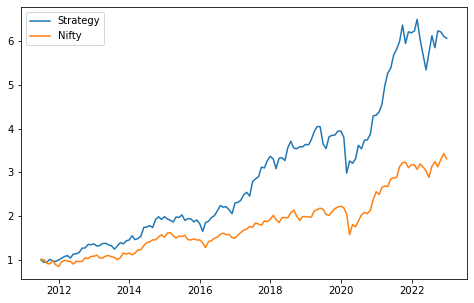

In [701]:
plt.figure(figsize = (8,5))
plt.plot(eval['Strategy'], label = 'Strategy')
plt.plot(eval['Nifty'], label = 'Nifty')
plt.legend()

In [693]:
lag = range(0,10,2)
period = range(5,31,2)
stocks_no = range(5,25,5)

In [621]:
combination = list(product(lag, period, stocks_no))

In [622]:
len(combination)

260

In [623]:
def mom(lag, period, stocks_no):
    
    combined_df = data.copy()

    combined_df.index = pd.to_datetime(combined_df.index)

    returns = combined_df.copy()

    combined_df = combined_df.resample('M').last()
    combined_df = combined_df.shift(lag)/combined_df.shift(period)

    stocks_list = []

    for i in range(len(combined_df)):
        stocks_list.append([combined_df.index[i],combined_df.iloc[i].dropna().sort_values().nlargest(stocks_no).index])

    stocks_list = pd.DataFrame(stocks_list)

    returns = returns.resample('M').last()
    returns = returns/returns.shift(1)

    perform = []
    for i in range(len(returns)-1):
        perform.append([returns.index[i],returns.loc[:,stocks_list[1][i]].iloc[i+1].mean()])

    perform = pd.DataFrame(perform)
    perform = perform.dropna()
    perform = perform.iloc[1:]

    perform = perform.rename(columns = {0:'Date',1:'Monthly_returns'})

    perform.index = pd.to_datetime(perform.loc[:,'Date'])

    perform['Strategy'] = perform.loc[:,'Monthly_returns'].cumprod()

    perform = perform.dropna()
    return(perform['Strategy'][-1], lag, period,stocks_no)

In [577]:
opt= []
for q in combination:
    val = mom(q[0],q[1],q[2])
    print(val)
    opt.append(val)

(3.16797517596181, 0, 5, 5)
(3.244150173885168, 0, 5, 10)
(3.568335185940725, 0, 5, 15)
(4.2083041818975, 0, 5, 20)
(4.61581645968322, 0, 7, 5)
(5.965039739933995, 0, 7, 10)
(5.016837072135068, 0, 7, 15)
(5.0777201248964605, 0, 7, 20)
(5.178362710909153, 0, 9, 5)
(5.64289842394095, 0, 9, 10)
(5.992094758314504, 0, 9, 15)
(5.494950563765507, 0, 9, 20)
(7.084178466274077, 0, 11, 5)
(5.841703037308246, 0, 11, 10)
(5.433333075268318, 0, 11, 15)
(5.555584579647506, 0, 11, 20)
(3.730705121233134, 0, 13, 5)
(6.176043675505882, 0, 13, 10)
(5.881597613732192, 0, 13, 15)
(5.808102030699371, 0, 13, 20)
(5.609473261120236, 0, 15, 5)
(6.923973492552352, 0, 15, 10)
(7.016908145317458, 0, 15, 15)
(6.705540031537247, 0, 15, 20)
(5.388909521883393, 0, 17, 5)
(5.3963795434706165, 0, 17, 10)
(4.914016909674955, 0, 17, 15)
(5.13648960639529, 0, 17, 20)
(6.3691328268486185, 0, 19, 5)
(5.882048041759929, 0, 19, 10)
(4.7651744904605495, 0, 19, 15)
(4.623737195304986, 0, 19, 20)
(7.072359833427588, 0, 21, 5)


In [580]:
opt = pd.DataFrame(opt, columns = ['Returns', 'Lag', 'Period', 'Number of stock']).sort_values(by='Returns').reset_index(drop=True)

In [582]:
opt['Lag'] = opt['Lag'].rolling(10).mean()
opt['Period'] = opt['Period'].rolling(10).mean()
opt['Number of stock'] = opt['Number of stock'].rolling(10).mean()


In [584]:
opt = opt.dropna()

<AxesSubplot:>

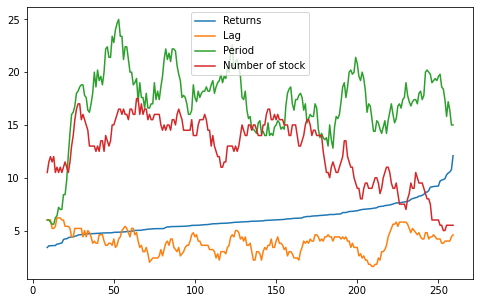

In [588]:
opt.plot(figsize = (8,5))